# Redes Neuronales usando Librerías

### 1. Seteo de librerías a usar

In [5]:
#!pip install scikit-learn
#!pip install pandas

In [6]:
import pandas as pd

from sklearn.neural_network import MLPRegressor #multilayer perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler #standarizar

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

### 2. Reconocimiento de la base de datos

La base de datos es de un aeropuerto comercial donde veremos las horas de partida, llegada, cancelaciones, etc. del año 2008.

In [7]:
data = pd.read_csv(f'base_datos_2008.csv.gz', compression='gzip')

In [8]:
data.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,N612SW,88.0,90.0,78.0,-6.0,-4.0,IND,BWI,515,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0


In [9]:
print("Cantidad de Datos en la Base: ",len(data))

Cantidad de Datos en la Base:  7009728


### 3. Selección y filtrado de variables a usar

Para los siguientes datos se les filtrará los NaN's para mayor facilidad.

 https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html

In [10]:
df = data.dropna(subset=['AirTime','Distance','TaxiIn','TaxiOut','DepDelay'])

In [11]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,N612SW,88.0,90.0,78.0,-6.0,-4.0,IND,BWI,515,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0


In [12]:
print("Cantidad de Datos en la Base: ",len(df))

Cantidad de Datos en la Base:  6855029


Selección de registros aleatorios

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html

In [13]:
df = df.sample(frac=1).head(10000)

In [14]:
print("Cantidad de Datos en la Base: ",len(df))

Cantidad de Datos en la Base:  10000


### 3. Agrupación de datos de Entrenamiento y Testeo 

#### Selección de Variables Dependientes e Independientes

In [15]:
X = df[['AirTime','Distance','TaxiIn','TaxiOut','DepDelay']]
Y = df['ArrDelay']

#### Split de datos de Entrenamiento y testeo

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=1)

#### Estandarización de variables

In [17]:
scaler = StandardScaler() #quita media y divide entre desviiación estándar, similares características
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#### Inicialización del modelo

In [18]:
clf = MLPRegressor(solver='sgd', learning_rate='constant', learning_rate_init=1e-5, activation='relu', hidden_layer_sizes=(10,))

In [19]:
print(MLPRegressor.__doc__)

Multi-layer Perceptron regressor.

    This model optimizes the squared error using LBFGS or stochastic gradient
    descent.

    .. versionadded:: 0.18

    Parameters
    ----------
    hidden_layer_sizes : tuple, length = n_layers - 2, default=(100,)
        The ith element represents the number of neurons in the ith
        hidden layer.

    activation : {'identity', 'logistic', 'tanh', 'relu'}, default='relu'
        Activation function for the hidden layer.

        - 'identity', no-op activation, useful to implement linear bottleneck,
          returns f(x) = x

        - 'logistic', the logistic sigmoid function,
          returns f(x) = 1 / (1 + exp(-x)).

        - 'tanh', the hyperbolic tan function,
          returns f(x) = tanh(x).

        - 'relu', the rectified linear unit function,
          returns f(x) = max(0, x)

    solver : {'lbfgs', 'sgd', 'adam'}, default='adam'
        The solver for weight optimization.

        - 'lbfgs' is an optimizer in the family of qu

#### Entrenamiento del modelo

In [20]:
model = clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


#### Predicciones y metricas

In [21]:
predictions = model.predict(X_test)
print("R2: ", r2_score(y_test, predictions))

R2:  0.9338729192979243


#### Diagramación

In [22]:
df = pd.DataFrame(columns=['y'], data=y_test.values)
df['y_hat'] = predictions

In [23]:
df = df.sort_values(by='y')

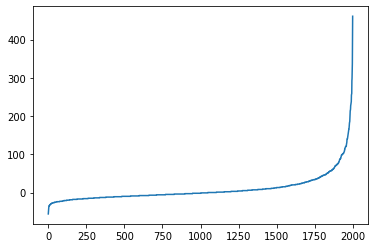

In [24]:
import matplotlib.pyplot as plt
plt.plot(df['y'].values)

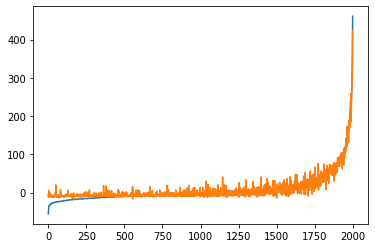

In [25]:
plt.plot(df['y'].values)
plt.plot(df['y_hat'].values)